In [68]:
from datasets import load_dataset, load_metric, Dataset, DatasetDict, load_from_disk
from huggingface_hub import notebook_login
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import itertools
from tqdm.notebook import tqdm
sns.set_style()
sns.set_theme()

In [44]:
dataset = load_dataset("bigcode/pseudo-labeled-python-data-pii-detection", use_auth_token=True)

In [112]:
Counter([p['tag'] for p in itertools.chain(*dataset['predicted_pii'])])

Counter({'NAME': 21176,
         'PASSWORD': 16382,
         'USERNAME': 15959,
         'KEY': 78188,
         'EMAIL': 33899,
         'IP_ADDRESS': 64800})

In [63]:
TAGS = ['NAME',
         'USERNAME',
         'PASSWORD',
         'KEY',
         'EMAIL',
         'IP_ADDRESS']

In [64]:
confidence = {tag:[p['confidence'] for p in tqdm(itertools.chain(*dataset['predicted_pii'])) 
                   if p['tag']==tag] for tag in TAGS}

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

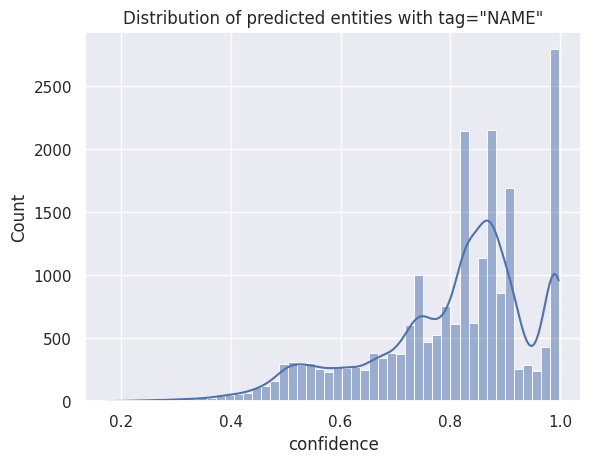

In [91]:
tag = 'NAME'
sns.histplot(confidence[tag], kde=True, bins=50 )
plt.xlabel('confidence')
_=plt.title(f'Distribution of predicted entities with tag="{tag}"')

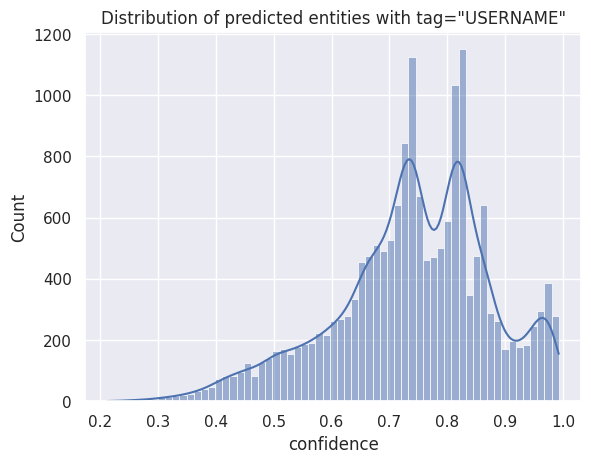

In [77]:
tag = 'USERNAME'
sns.histplot(confidence[tag], kde=True )
plt.xlabel('confidence')
_=plt.title(f'Distribution of predicted entities with tag="{tag}"')

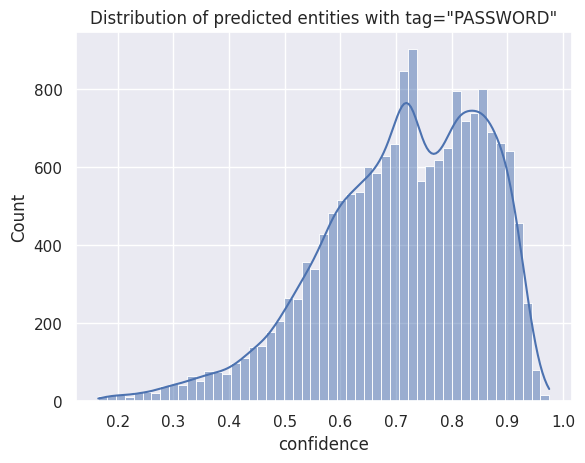

In [78]:
tag = 'PASSWORD'
sns.histplot(confidence[tag], kde=True )
plt.xlabel('confidence')
_=plt.title(f'Distribution of predicted entities with tag="{tag}"')

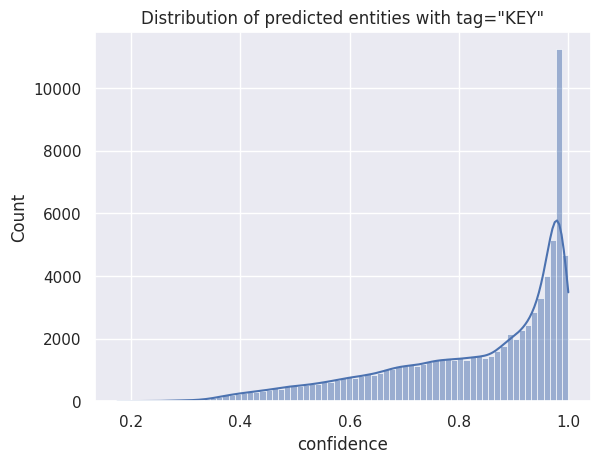

In [79]:
tag = 'KEY'
sns.histplot(confidence[tag], kde=True )
plt.xlabel('confidence')
_=plt.title(f'Distribution of predicted entities with tag="{tag}"')

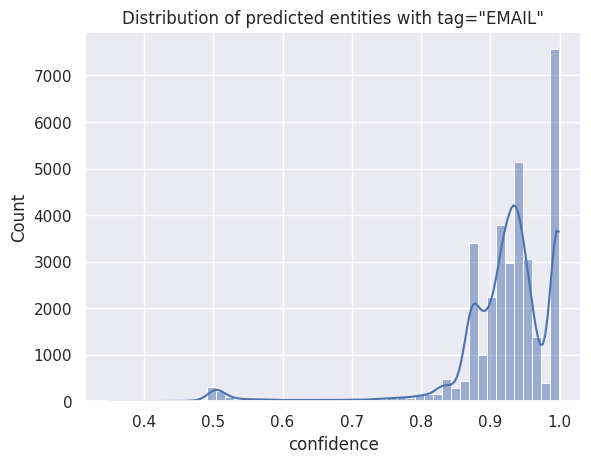

In [86]:
tag = 'EMAIL'
sns.histplot(confidence[tag], kde=True, bins=50)
plt.xlabel('confidence')
_=plt.title(f'Distribution of predicted entities with tag="{tag}"')

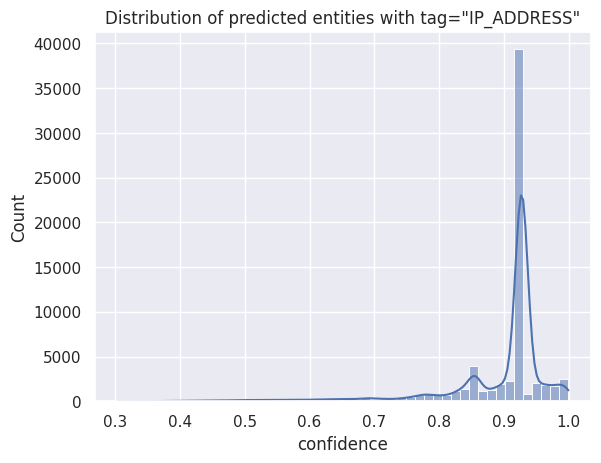

In [83]:
tag = 'IP_ADDRESS'
sns.histplot(confidence[tag], kde=True, bins=50)
plt.xlabel('confidence')
_=plt.title(f'Distribution of predicted entities with tag="{tag}"')

In [114]:
sorted_pii = sorted(itertools.chain(*dataset['predicted_pii']), key = lambda e: e['confidence'])

### Most confident predictions

In [106]:
most_confident_per_tag = {}
for tag in TAGS:
    most_confident = filter(lambda e: e['tag']==tag, reversed(sorted_pii))
    most_confident = [next(most_confident)['value'] for _ in range(30)]
    most_confident_per_tag[tag] = most_confident
    
pd.DataFrame.from_dict(most_confident_per_tag)

,NAME,USERNAME,PASSWORD,KEY,EMAIL,IP_ADDRESS
0,Michael J. Palmer,@joelthompson,Test Hello World,iVBORw0KGgoAAAANSUhEUgAAAQAAAAEACAYAAABccqhmAA...,chris@grabosky.net,2001:200::1
1,James W. Kennington,@felixfontein,ca$hc0w,iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAYAAADDPmHLAA...,ryan@ryanshaffer.net,2100::101
2,John J. Farrell,@felixfontein,Pa$$w0rd,QlpoOTFBWSZTWdiS1EEAFgfBgAAQP///8GCRpqZS+vru3b...,root@grassfish.net,2100::102
3,Robert R. Puccinelli,@caphrim007,Test Hello World,iVBORw0KGgoAAAANSUhEUgAAAQAAAAEACAYAAABccqhmAA...,user@example.com,2000:0030::1
4,Michael E. Rose,@ryansb,$ecret,iVBORw0KGgoAAAANSUhEUgAAARcAAAELCAYAAADzx8I0AA...,rich@openwatch.net,2100::103
5,Jacob Kerr Nielsen,@justjais,$ecret,eJztfWtv20iW6PcA+Q81bKQltWU9/VSuNqvYSdsTO/bGTm...,user@readmoa.net,2100::104
6,Martin P. Hellwig,@joelthompson,$ecret,iVBORw0KGgoAAAANSUhEUgAAAMYAAABFCAYAAAARv5krAA...,tek@randhome.io,2100::103
7,James Steele Howard,@redwhitemiko,P@ssw0rd,iVBORw0KGgoAAAANSUhEUgAAALQAAAAyCAYAAAD1JPH3AA...,peter@peterodding.com,1002::1
8,David P. Fleming,@jedelman8,P@ssw0rd,gAJ9cQEoSwB9cQIoSwBdcQMoR0AwH1wo9cKPR0AuTMzMzM...,dev@mafro.net,1002::1
9,Mark van der Woude,@michaeljs1990,bd@12345,gAJ9cQEoSwB9cQIoSwBdcQMoR0BC8OVgQYk3R0BKvhR64U...,user@aiida.net,2002::1


### Least confident predictions

In [115]:
least_confident_per_tag = {}
for tag in TAGS:
    least_confident = filter(lambda e: e['tag']==tag, sorted_pii)
    least_confident = [next(least_confident)['value'] for _ in range(30)]
    least_confident_per_tag[tag] = least_confident
    
pd.DataFrame.from_dict(least_confident_per_tag)

,NAME,USERNAME,PASSWORD,KEY,EMAIL,IP_ADDRESS
0,Mio,iiwiw,ur1234567-0abc12de3f456gh7ij89k012,ur1234567-0abc12de3f456gh7ij89k012,Bob,4888
1,Ziirish,yuanjie,ABCDEFGHIKLMNOPQRSTUVWXYZ,ur1234567-0abc12de3f456gh7ij89k012,Homer.Simpson,90.176.170.125
2,Eduardo,AnarL,etvbqlxhncpjmayfguisrwzkod,ABCDEFGHIJKLMNOPQRSTUVWXYZ,@cmyui,14685.3.1.12.1
3,Emilio,NingAnMe,d9ed216f67f04a84bf8fd97c155855cd,ur1234567-0abc12de3f456gh7ij89k012,@m.c,14685.3.1.12.2
4,Esbiya,hello,abcdefghijklmnopqrstuvwxyz,abcdefghjkmnpqrstuvwxyz,Alex,14685.3.1.12.3
5,taozhou,MelissaChan,234234234324asjdkfhjsdhf23949239423,ur1234567-0abc12de3f456gh7ij89k012,user,127.0.0.1
6,Parth,yuanjie,ABCDEFGHIKLMNOPQRSTUVWXYZ,ur1234567-0abc12de3f456gh7ij89k012,test-org,100.100.122.90
7,Kuniwak,Rogerspy,abcdefghijklmnopqrstuvwyxz,9de5069c5afe602b2ea0a04b66beb2c0,Homer.Simpson,127.0.0.1
8,Flavio,suzie,ur1234567-0abc12de3f456gh7ij89k012,ur1234567-0abc12de3f456gh7ij89k012,@b.c,0.0.0.0
9,Agam,BI21,ur1234567-0abc12de3f456gh7ij89k012,ur1234567-0abc12de3f456gh7ij89k012,lucaspardue.24.7,0.0.0.0
